In [2]:
import pandas as pd
import numpy as np
import plotly.express as pe
import plotly.express as px
import plotly.graph_objects as pg
import seaborn as sns
#sns.set(style = 'dargrid')
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
data = pd.read_csv('workers_data.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


<Axes: xlabel='age', ylabel='education'>

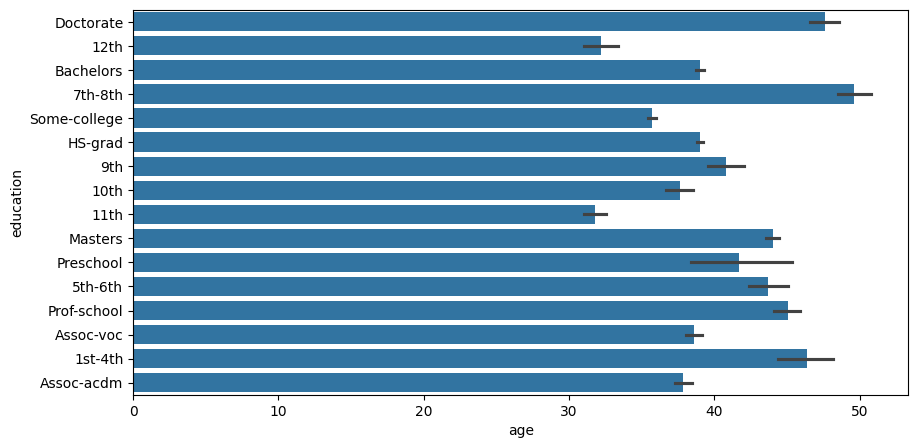

In [3]:
#what is the average age of each educational level
dp = data[['age','education']]
dp.groupby(['education'])[['age']].mean()
plt.figure(figsize=(10,5))
sns.barplot(x= dp.age , y= dp.education,estimator = 'mean')

In [4]:
#- Of all education level, what level has the most capital gain
ft= data[['education','capital-gain']]
ft = ft.groupby(['education'])[['capital-gain']].mean().sort_values(by= 'capital-gain', ascending=False)
viz = pe.bar(data_frame = ft, x = ft.index, y= 'capital-gain', color = ft['capital-gain'], width = 1300, height= 500, title= ' Capital Gain for all education status')
viz.show()

[Text(0, 0, '92.9'),
 Text(0, 0, '91.7'),
 Text(0, 0, '68.5'),
 Text(0, 0, '63.3'),
 Text(0, 0, '33.5')]

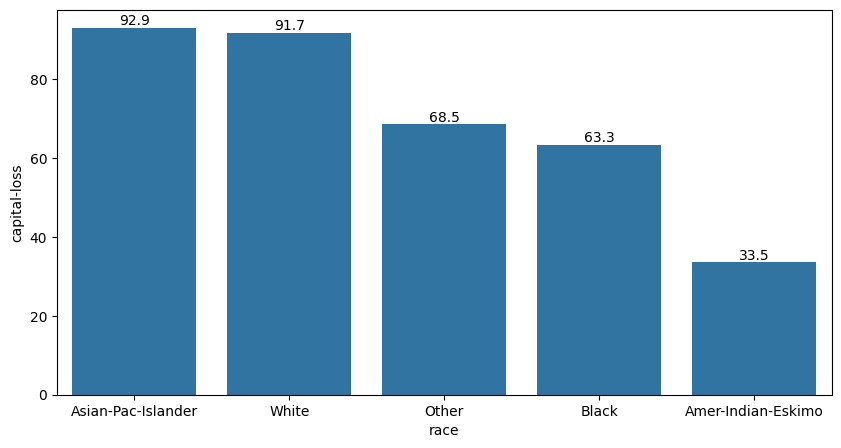

In [5]:
#-- What race has the most capital loss
ft = data[['race','capital-loss']]
ft = ft.groupby(['race'])[['capital-loss']].mean().sort_values(by= 'capital-loss',ascending= False)
plt.figure(figsize = (10,5))
viz = sns.barplot( x = ft.index, y = ft['capital-loss'])
viz.bar_label(viz.containers[0], fmt = '%.1f')

In [6]:
#-- What is the total capital loss for all Female that is Divorced
ft = data[['capital-loss','gender','marital-status']]
dp =ft.loc[(data.gender == 'Female') & (data['marital-status'] == 'Divorced')] 
dp.groupby(['gender','marital-status'])[['capital-loss']].sum()

,,capital-loss
gender,marital-status,
Female,Divorced,199978


In [7]:
#In your advice, if you are gonna give a loan, what Marital Status would you consider
ft = data[['marital-status','income_>50K']]
ft.groupby(['marital-status'])[['income_>50K']].mean().sort_values(by= 'income_>50K', ascending= True)

,income_>50K
marital-status,
Never-married,0.046097
Separated,0.061719
Widowed,0.082845
Married-spouse-absent,0.094737
Divorced,0.100821
Married-AF-spouse,0.354839
Married-civ-spouse,0.445972


In [8]:
#- SHow the total capital gain of all Doctorate education level
ft = data[['capital-gain','education']]
dp = ft.loc[(data.education == 'Doctorate')]
dp.groupby(['education'])[['capital-gain']].sum()

,capital-gain
education,
Doctorate,3165535


In [9]:
#-- Who works the most total hours per week in the varying Occupation. What is the average capital gain of this class.
ft = data[['hours-per-week','occupation','capital-gain']]
ft.groupby(['occupation'])[['hours-per-week','capital-gain']].mean()

,hours-per-week,capital-gain
occupation,,
Adm-clerical,37.724021,494.315148
Armed-Forces,44.307692,561.384615
Craft-repair,42.248052,700.829317
Exec-managerial,44.980930,2296.193789
Farming-fishing,46.494807,722.637240
Handlers-cleaners,37.832268,292.164004
Machine-op-inspct,40.768351,317.348580
Other-service,34.630845,223.345324
Priv-house-serv,33.057778,179.120000


In [10]:
#-- What race is divorces the most.
ft = data[['race','marital-status']]
dp =ft.loc[(data['marital-status'] == 'Divorced')]
dp.groupby(['race'])[['marital-status']].count().sort_values(by= 'marital-status', ascending= False)

,marital-status
race,
White,5118
Black,634
Asian-Pac-Islander,103
Amer-Indian-Eskimo,78
Other,38


In [11]:
#-- What Marital Status works the most total hours. What race mostly constitute this status
ft = data[['marital-status','hours-per-week','race']]
ft.groupby(['marital-status','race'])[['hours-per-week']].mean().sort_values(by= 'hours-per-week', ascending= False)

hours-per-week
marital-status        race                              
Married-AF-spouse     Asian-Pac-Islander       60.000000
Married-civ-spouse    White                    43.504714
                      Amer-Indian-Eskimo       43.111842
                      Asian-Pac-Islander       42.478326
Divorced              Asian-Pac-Islander       42.048544
                      White                    41.282337
Married-civ-spouse    Black                    41.218451
Separated             Other                    41.000000
                      Asian-Pac-Islander       40.391304
Married-civ-spouse    Other                    40.238095
Married-spouse-absent Asian-Pac-Islander       40.135593
Divorced              Other                    40.105263
Married-AF-spouse     Black                    40.000000
Married-spouse-absent Amer-Indian-Eskimo       40.000000
Separated             White                    39.938090
Married-spouse-absent White                    39.737745
Divorced              Black                    39.487382
                      Amer-Indian-Eskimo       39.333333
Married-spouse-absent Black                    39.189873
Married-AF-spouse     White                    39.185185
Never-married         Amer-Indian-Eskimo       39.141892
Married-spouse-absent Other                    38.857143
Separated             Black                    38.325779
                      Amer-Indian-Eskimo       38.000000
Never-married         Other                    37.946309
Widowed               Other                    37.750000
Never-married         Black                    37.330038
                      White                    36.788952
                      Asian-Pac-Islander       36.016563
Widowed               Asian-Pac-Islander       34.514286
                      Amer-Indian-Eskimo       34.277778
                      Black                    33.865922
                      White                    33.308719

In [12]:
# Is there a correlation between hours worked and Capital gain
ft = data[['hours-per-week','capital-gain']]
fig = pe.scatter(data_frame = ft, x = 'hours-per-week', y = 'capital-gain', title='Correlation between the Capital gain and Hours per week')
fig.show()